In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data=pd.read_csv('credit.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [31]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

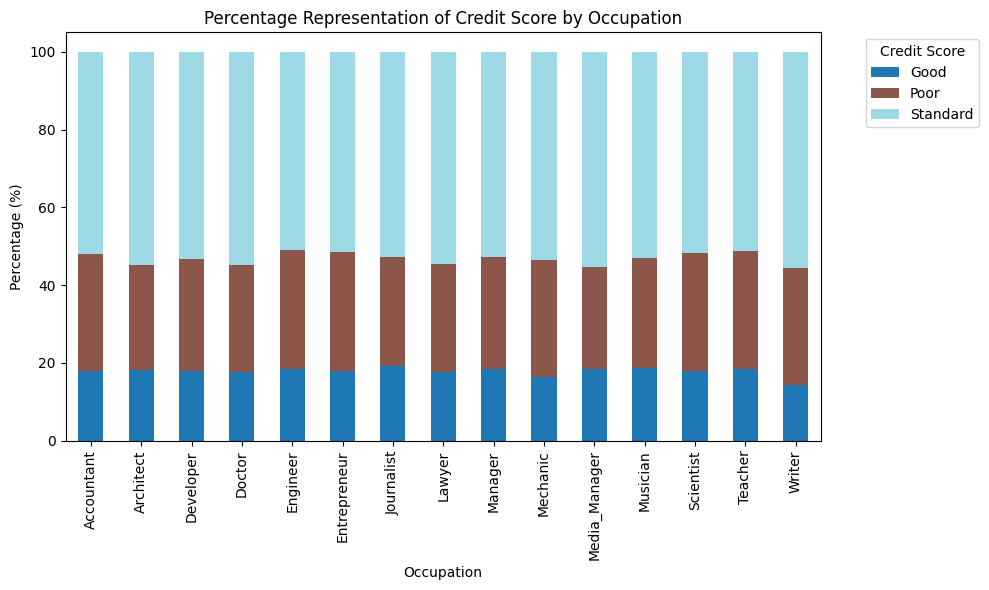

In [32]:
# Step 1: Create a cross-tabulation of Credit_Score and Occupation
occupation_credit_score = pd.crosstab(data['Occupation'], data['Credit_Score'], normalize='index') * 100

# Step 2: Plot a stacked bar chart to show the percentage of each Credit_Score category per Occupation
occupation_credit_score.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

# Step 3: Add labels and title
plt.title('Percentage Representation of Credit Score by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage (%)')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Step 4: Show the plot
plt.show()

C:\Users\lincy\AppData\Local\Temp\ipykernel_18596\710769950.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom[i] + val / 2,  # Positioning text in the middle of the bar


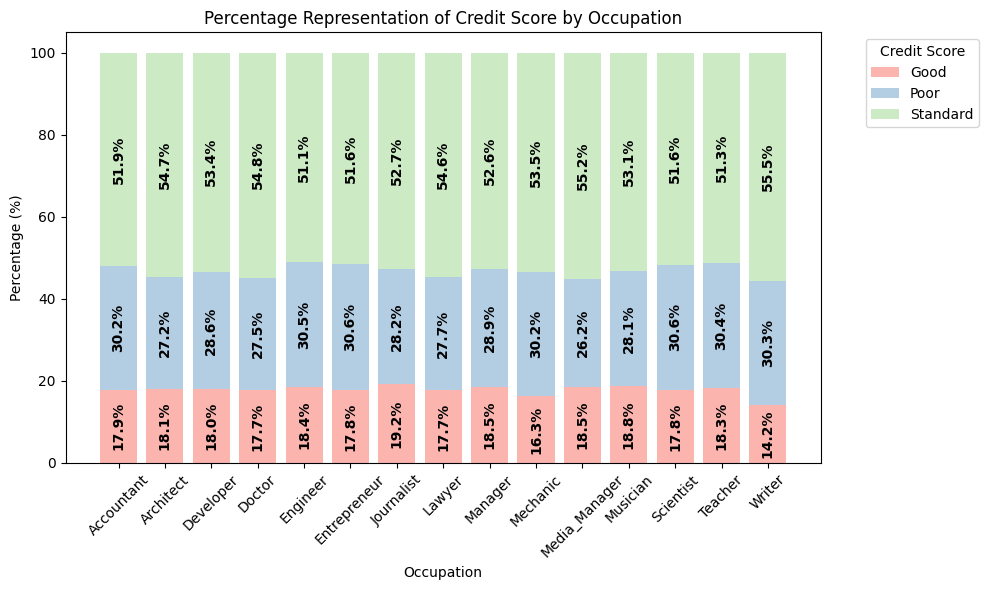

In [33]:


# Step 1: Create a cross-tabulation of Occupation and Credit_Score with percentage representation
occupation_credit_score = pd.crosstab(data['Occupation'], data['Credit_Score'], normalize='index') * 100

# Step 2: Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Step 3: Plot a stacked bar chart
bottom = np.zeros(len(occupation_credit_score))  # Initialize bottom for stacking

# Colors for different Credit Scores
colors = plt.get_cmap('Pastel1').colors

# Loop through each Credit_Score category and plot
for idx, credit_score in enumerate(occupation_credit_score.columns):
    ax.bar(
        occupation_credit_score.index, 
        occupation_credit_score[credit_score], 
        bottom=bottom, 
        label=credit_score, 
        color=colors[idx]
    )
    
    # Step 4: Annotate the percentage values on the bars
    for i, val in enumerate(occupation_credit_score[credit_score]):
        if val > 0:  # Only annotate where there's a positive value
            ax.text(
                i, 
                bottom[i] + val / 2,  # Positioning text in the middle of the bar
                f'{val:.1f}%', 
                ha='center', 
                va='center', 
                color='black', 
                fontsize=10, 
                fontweight='bold',
                rotation=90
            )
    
    # Update bottom for the next stack
    bottom += occupation_credit_score[credit_score]

# Step 5: Customize the chart
ax.set_title('Percentage Representation of Credit Score by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Percentage (%)')
ax.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Step 6: Display the plot
plt.show()


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [35]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [36]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

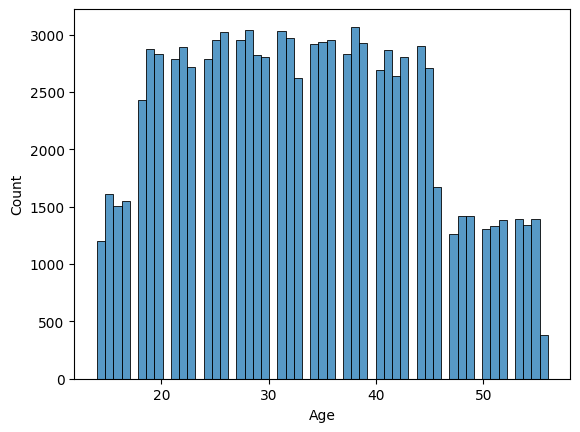

In [37]:
sns.histplot(data['Age'])
plt.show()

In [38]:
df=data[(data['Age']<18)]
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
288,6066,16512,1,ra Alperx,16.0,995378920.0,Mechanic,29469.98,2227.831667,7.0,...,Bad,3421.66,24.639658,159.0,Yes,69.685459,24.066131,Low_spent_Small_value_payments,363.272112,Standard
289,6067,16512,2,ra Alperx,16.0,995378920.0,Mechanic,29469.98,2227.831667,7.0,...,Bad,3421.66,30.268411,159.0,NM,69.685459,24.066131,High_spent_Small_value_payments,287.605940,Standard
290,6068,16512,3,ra Alperx,16.0,995378920.0,Mechanic,29469.98,2227.831667,7.0,...,Bad,3421.66,31.212269,160.0,Yes,69.685459,24.066131,High_spent_Large_value_payments,360.391056,Standard
291,6069,16512,4,ra Alperx,16.0,995378920.0,Mechanic,29469.98,2227.831667,7.0,...,Bad,3421.66,33.298654,161.0,Yes,69.685459,24.066131,High_spent_Medium_value_payments,375.846913,Poor
292,6070,16512,5,ra Alperx,16.0,995378920.0,Mechanic,29469.98,2227.831667,7.0,...,Bad,3421.66,38.177311,162.0,Yes,69.685459,24.066131,Low_spent_Medium_value_payments,361.833322,Poor


C:\Users\lincy\AppData\Local\Temp\ipykernel_18596\104156129.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(filtered_data, index=income_bins, columns=age_bins, aggfunc='size', fill_value=0)


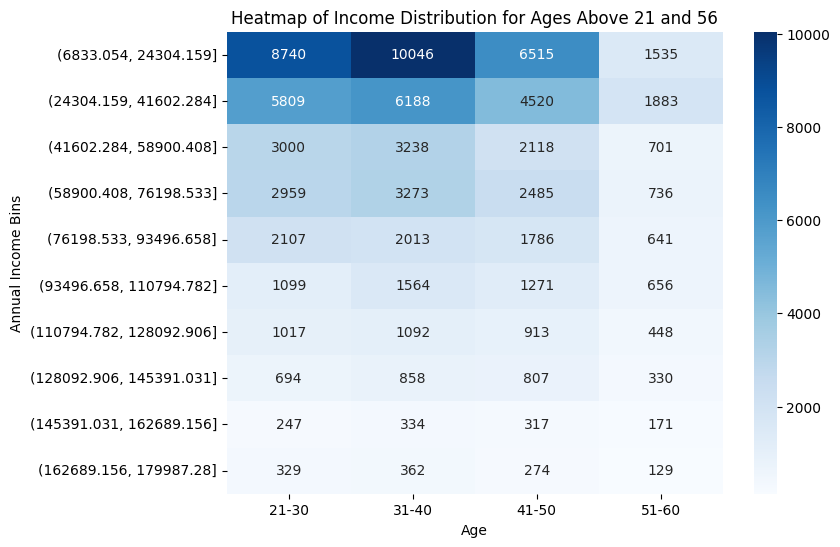

In [39]:
# Filter the data for age above 21 and 56
filtered_data = data[(data['Age'] > 21) | (data['Age'] > 56)]

# Create bins for age and income to group them
age_bins = pd.cut(filtered_data['Age'], bins=[21, 30, 40, 50, 60], labels=['21-30', '31-40', '41-50', '51-60'])
income_bins = pd.cut(filtered_data['Annual_Income'], bins=10)

# Create a pivot table to aggregate data counts
heatmap_data = pd.pivot_table(filtered_data, index=income_bins, columns=age_bins, aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt='d')
plt.title('Heatmap of Income Distribution for Ages Above 21 and 56')
plt.xlabel('Age')
plt.ylabel('Annual Income Bins')
plt.show()

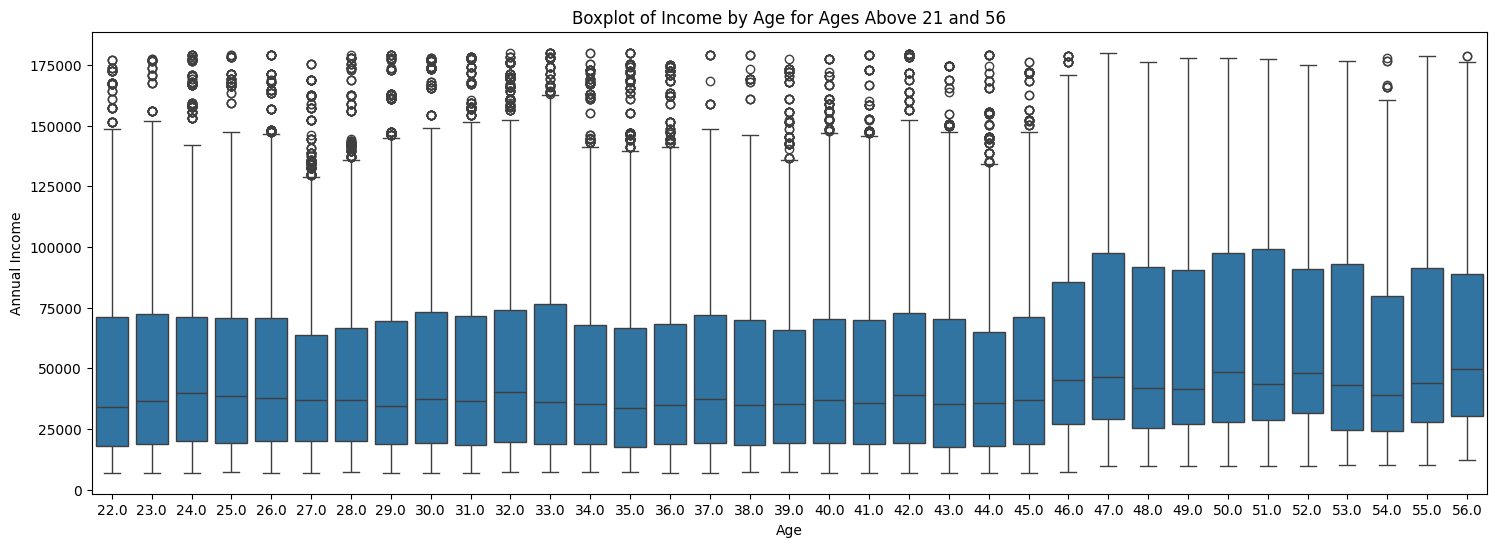

In [40]:
# Corrected filter: ages above 21 or above 56
filtered_data = data[(data['Age'] > 21) | (data['Age'] > 56)]

# Create a boxplot with Age on the x-axis and Annual Income on the y-axis
plt.figure(figsize=(18,6))
sns.boxplot(x='Age', y='Annual_Income', data=filtered_data)
plt.title('Boxplot of Income by Age for Ages Above 21 and 56')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

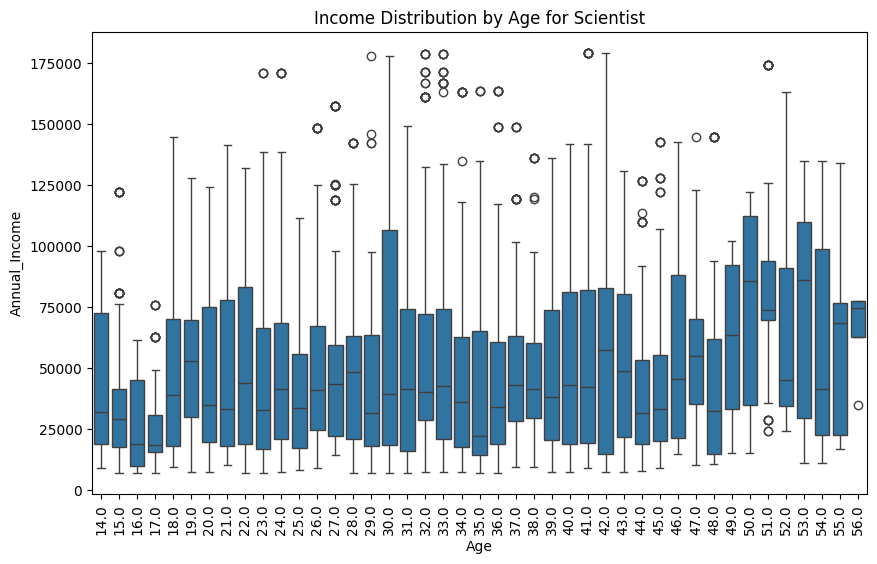

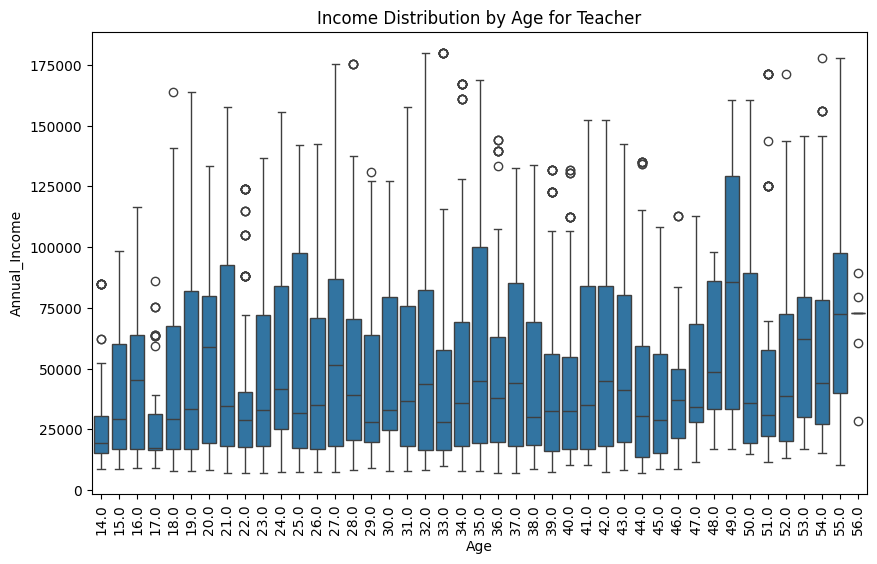

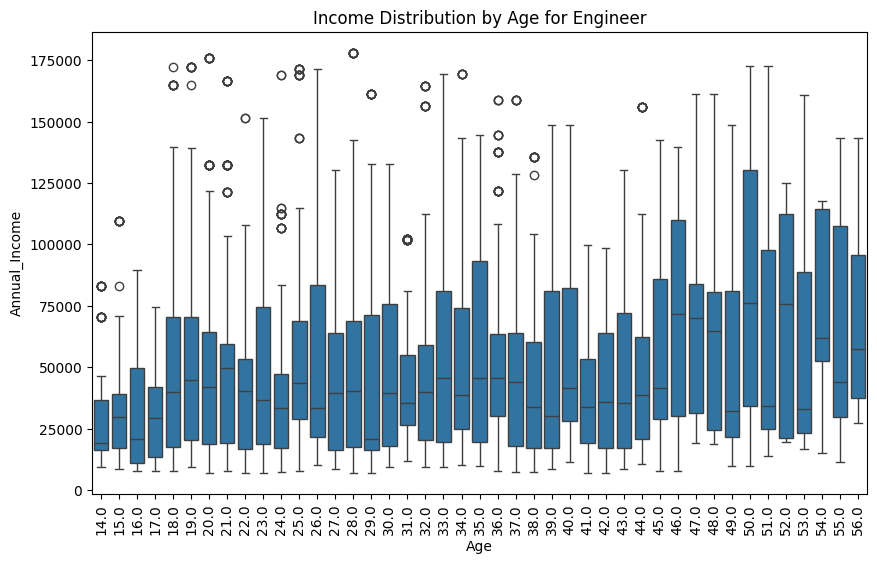

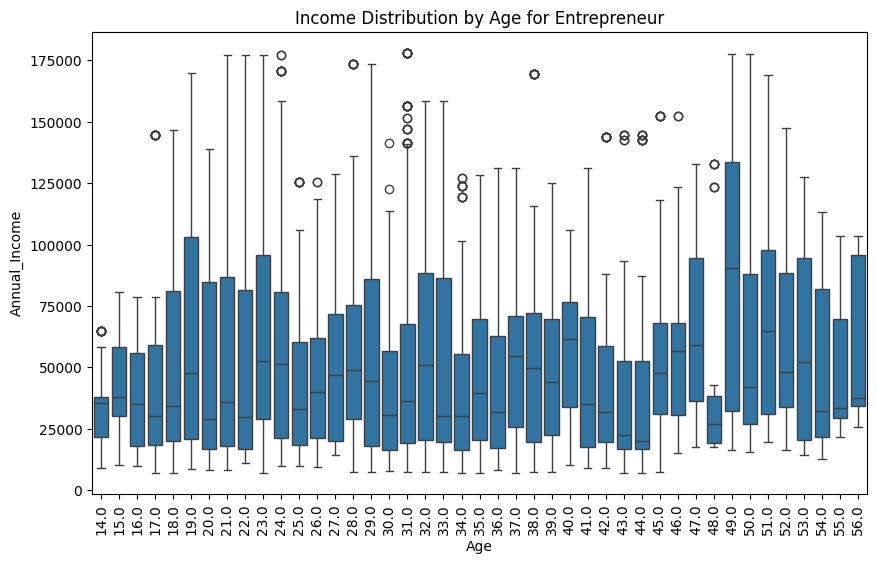

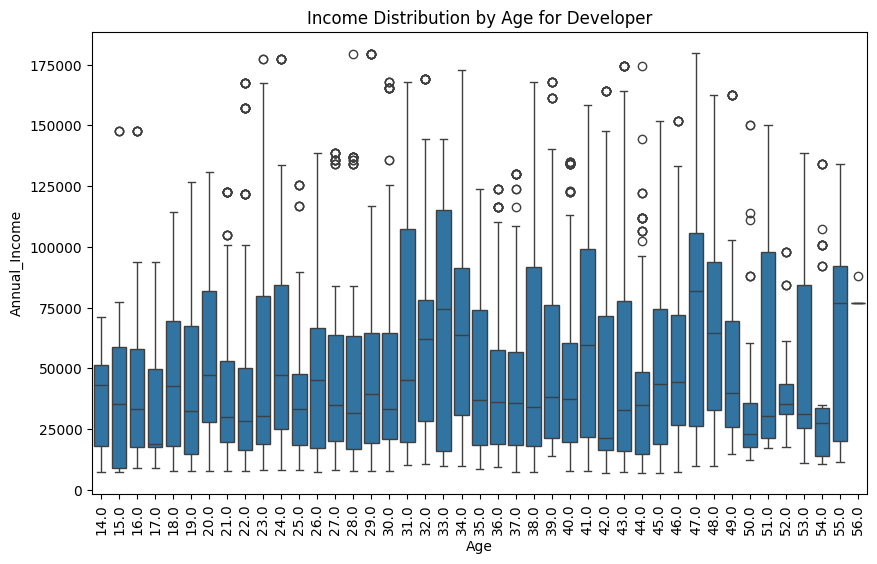

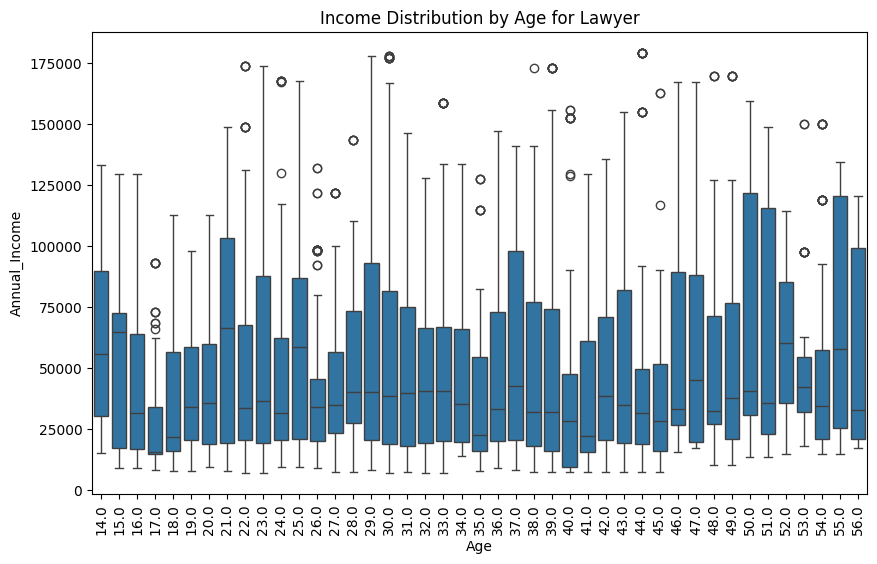

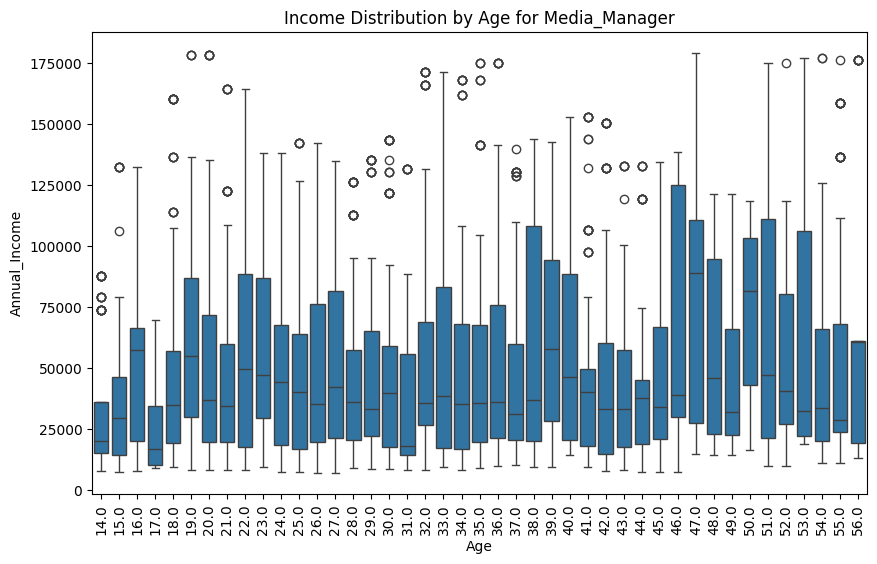

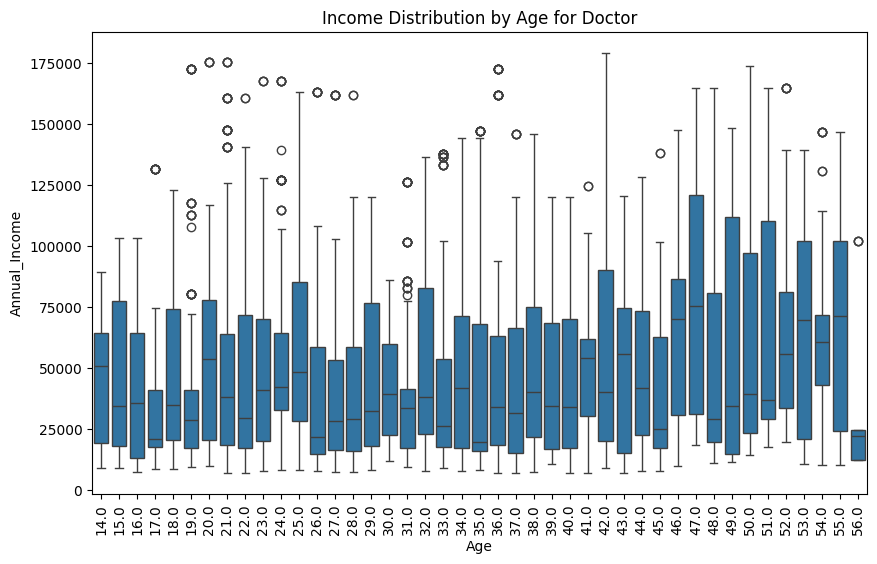

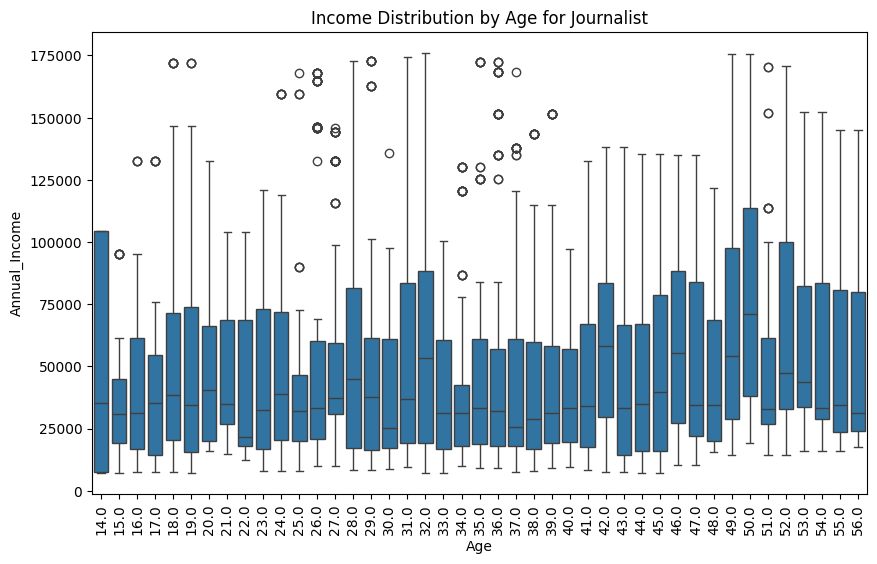

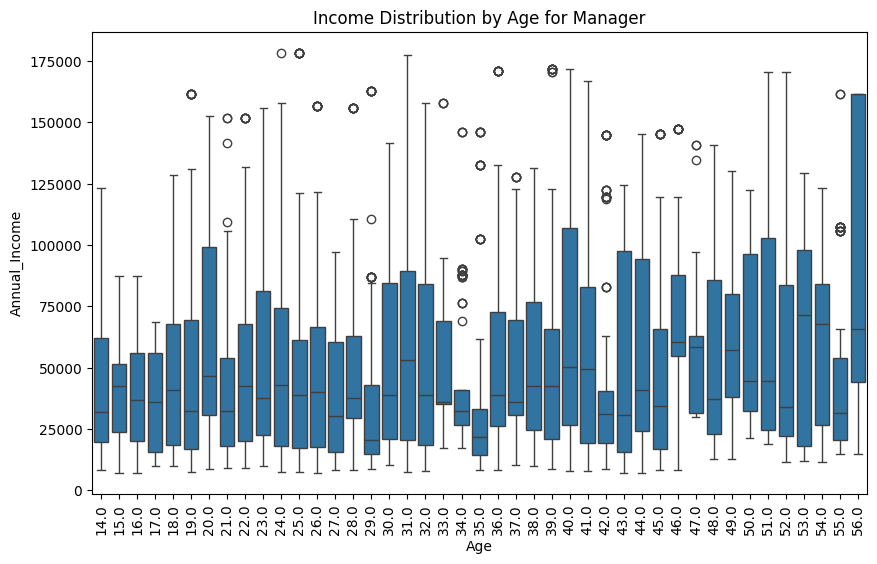

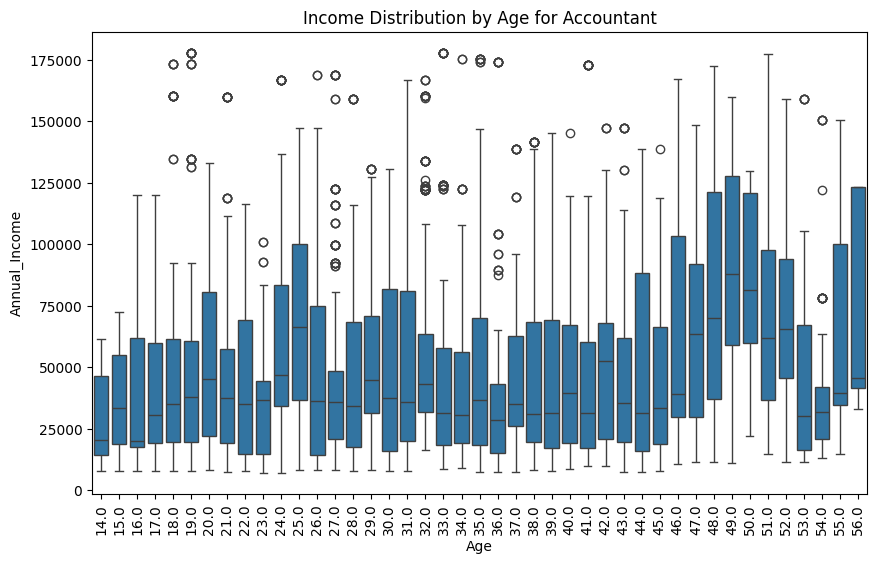

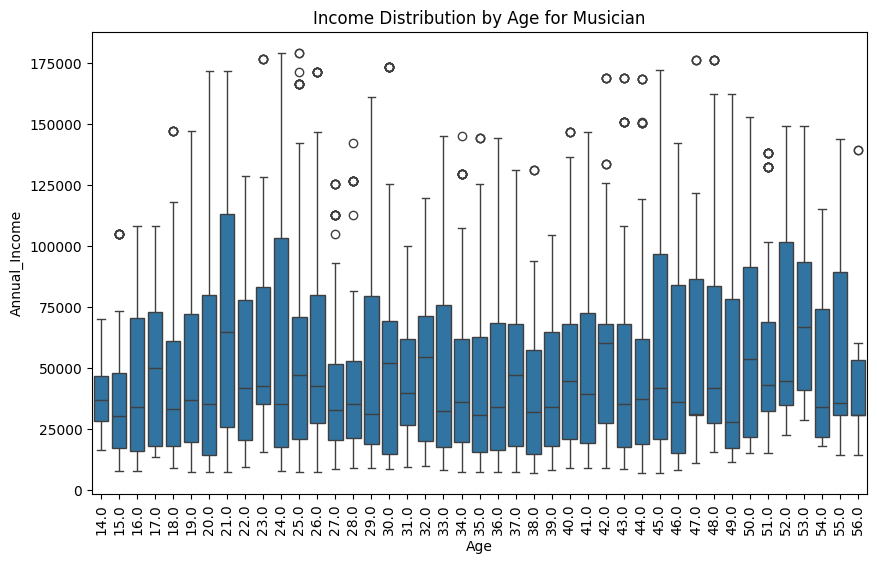

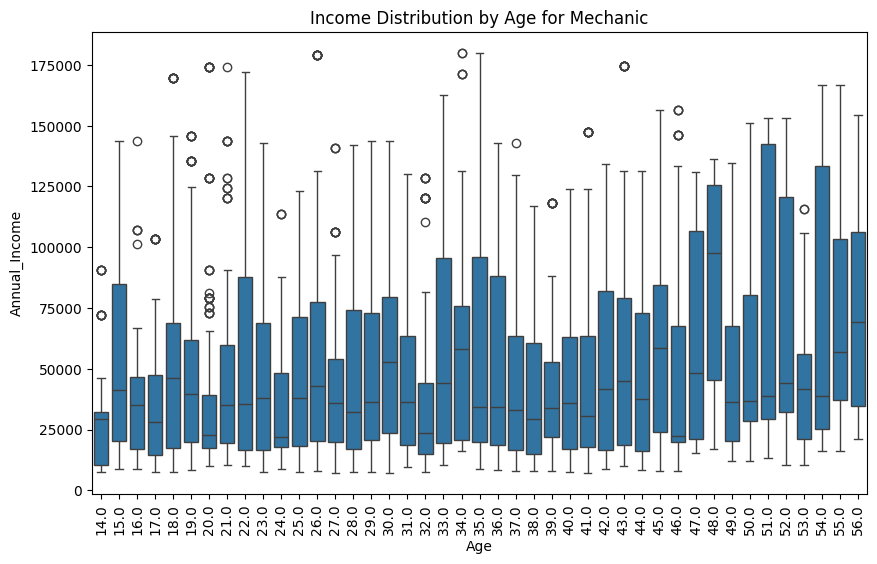

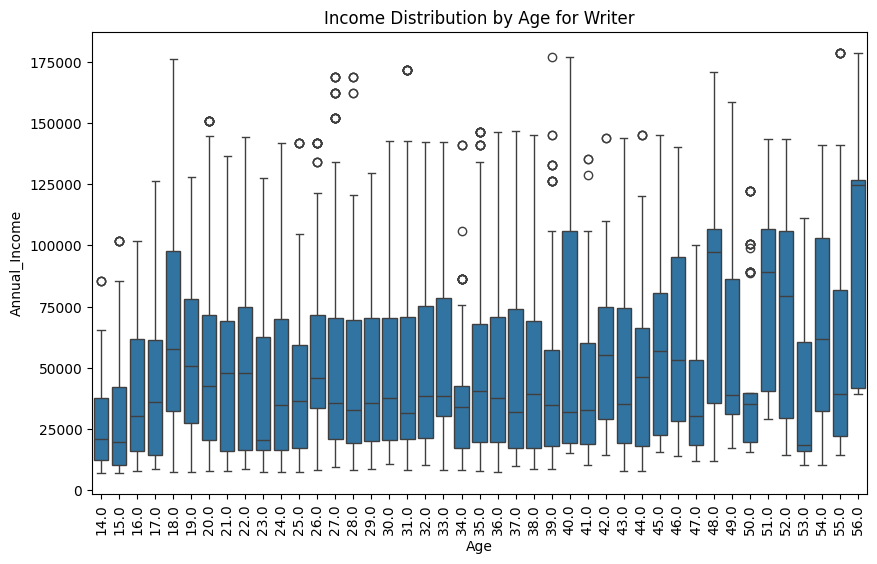

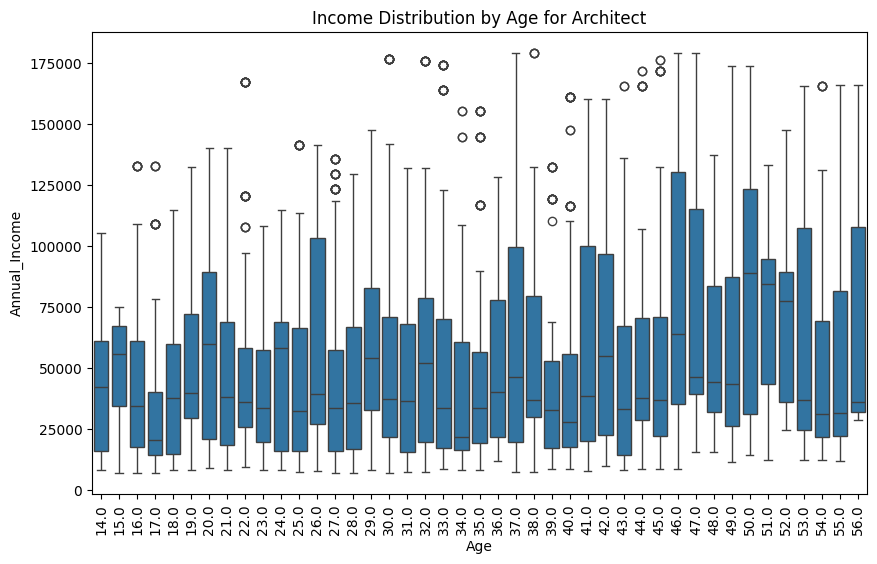

In [41]:
# Get unique occupations
occupations = data['Occupation'].unique()

# Create a separate plot for each occupation
for occupation in occupations:
    plt.figure(figsize=(10, 6))
    
    # Filter the dataset for the current occupation
    occupation_data = data[data['Occupation'] == occupation]
    
    # Create a boxplot for age vs income for the current occupation
    sns.boxplot(x='Age', y='Annual_Income', data=occupation_data)
    
    # Add title and labels
    plt.title(f'Income Distribution by Age for {occupation}')
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.show()


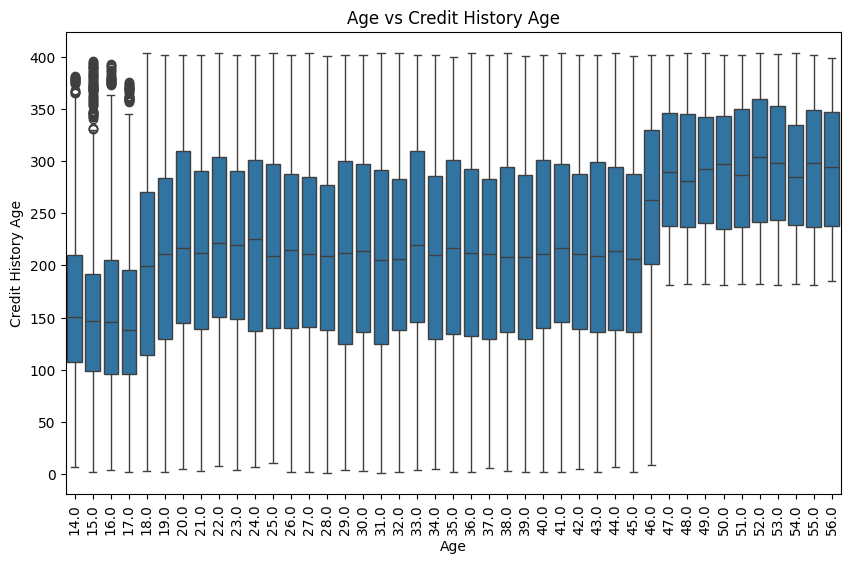

In [42]:
plt.figure(figsize=(10, 6))

# Create a scatter plot for Age vs Credit History Age
sns.boxplot(x='Age', y='Credit_History_Age', data=data)

# Add title and labels
plt.title('Age vs Credit History Age')
plt.xlabel('Age')
plt.ylabel('Credit History Age')
plt.xticks(rotation=90)
# Show the plot
plt.show()


In [43]:
df['Occupation'].unique()

array(['Mechanic', 'Entrepreneur', 'Developer', 'Musician', 'Teacher',
       'Manager', 'Journalist', 'Accountant', 'Writer', 'Doctor',
       'Scientist', 'Engineer', 'Architect', 'Media_Manager', 'Lawyer'],
      dtype=object)

In [44]:
df['Occupation'].value_counts()

Occupation
Teacher          459
Doctor           425
Entrepreneur     419
Media_Manager    411
Mechanic         406
Engineer         402
Accountant       399
Scientist        396
Manager          391
Lawyer           389
Writer           382
Architect        381
Developer        368
Musician         353
Journalist       287
Name: count, dtype: int64

In [45]:
df['Age'].unique()

array([16., 15., 14., 17.])

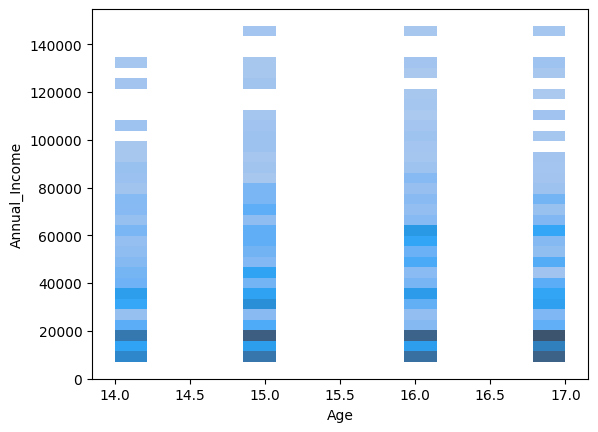

In [46]:
sns.histplot(x='Age',y='Annual_Income',data=df)
plt.show()

In [47]:
df.shape

(5868, 28)

In [48]:
#Create a salary range to group similar income levels (e.g., rounding to nearest thousand)
data['Income_Range'] = (data['Annual_Income'] // 1000) * 1000

# Define a function to update the Age based on median age for similar Occupation and Income Range
def update_age(row, df):
    if row['Age'] < 18:
        # Find similar individuals by occupation and income range
        similar_group = df[(df['Occupation'] == row['Occupation']) & 
                           (df['Income_Range'] == row['Income_Range']) & 
                           (df['Age'] >= 18)]
        
        # If similar group exists, return median age, otherwise use median age of all adults
        if not similar_group.empty:
            return similar_group['Age'].median()
        else:
            # Fallback: Use median age of all adults in the dataset
            return df[df['Age'] >= 18]['Age'].median()
    return row['Age']

# Apply the function to update ages below 18
data['Updated_Age'] = data.apply(update_age, axis=1, df=data)


# Save the updated dataset to a new file
data.to_csv('updated_credit_data.csv', index=False)

# Display rows where Age was updated
updated_rows = data[data['Age'] != data['Updated_Age']]
print(updated_rows[['ID', 'Age', 'Updated_Age', 'Occupation', 'Annual_Income']])

           ID   Age  Updated_Age Occupation  Annual_Income
288      6066  16.0         39.0   Mechanic       29469.98
289      6067  16.0         39.0   Mechanic       29469.98
290      6068  16.0         39.0   Mechanic       29469.98
291      6069  16.0         39.0   Mechanic       29469.98
292      6070  16.0         39.0   Mechanic       29469.98
...       ...   ...          ...        ...            ...
99803  155337  17.0         35.0  Developer       14937.49
99804  155338  17.0         35.0  Developer       14937.49
99805  155339  17.0         35.0  Developer       14937.49
99806  155340  17.0         35.0  Developer       14937.49
99807  155341  17.0         35.0  Developer       14937.49

[5868 rows x 5 columns]


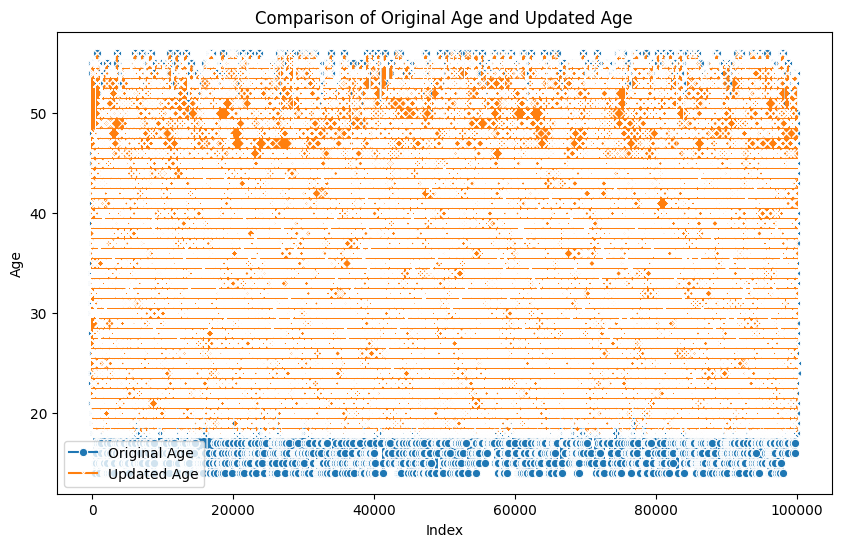

In [49]:
#Plot the lineplot for Age vs Updated_Age
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x=range(len(data)), y='Age', label='Original Age', marker="o")
sns.lineplot(data=data, x=range(len(data)), y='Updated_Age', label='Updated Age', marker="x")

# Adding plot labels and title
plt.title('Comparison of Original Age and Updated Age')
plt.xlabel('Index')
plt.ylabel('Age')
plt.legend()

# Show the plot
plt.show()

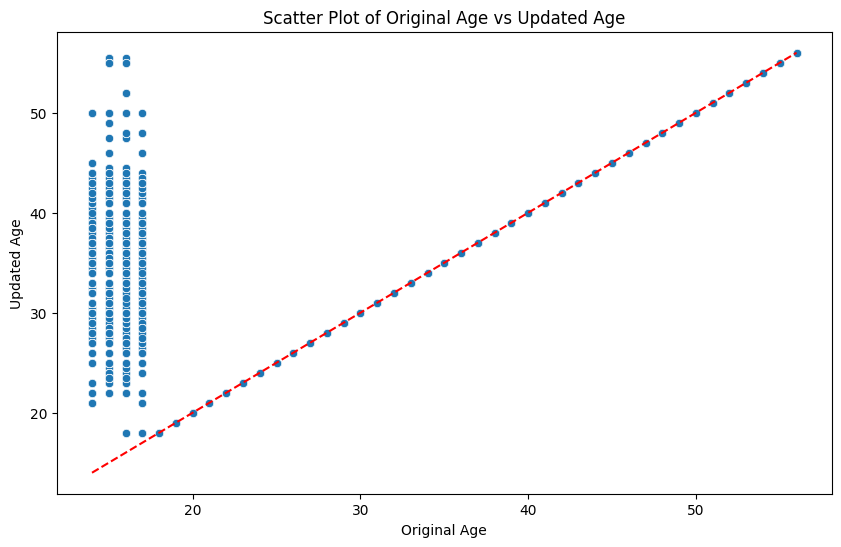

In [50]:
# Scatter Plot to compare original Age vs Updated Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Updated_Age', data=data)

# Add a line to indicate where the original age equals the updated age (perfect match)
plt.plot([data['Age'].min(), data['Age'].max()], [data['Age'].min(), data['Age'].max()], color='red', linestyle='--')

# Add titles and labels
plt.title('Scatter Plot of Original Age vs Updated Age')
plt.xlabel('Original Age')
plt.ylabel('Updated Age')

plt.show()

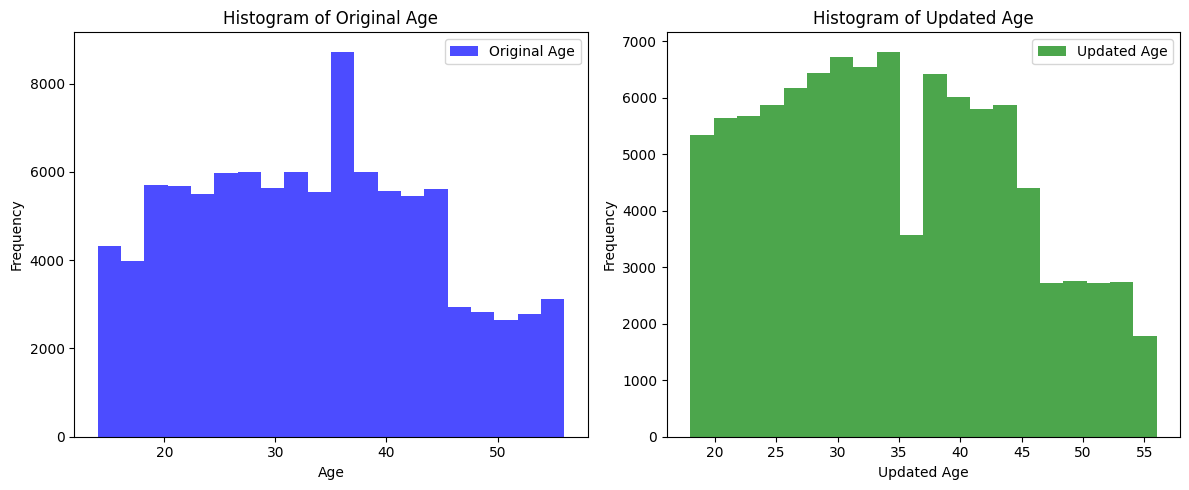

In [51]:
# Plot histograms for Age and Updated_Age side by side
plt.figure(figsize=(12, 5))

# First subplot for the original Age
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='blue', alpha=0.7, label='Original Age')
plt.title('Histogram of Original Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Second subplot for the Updated Age
plt.subplot(1, 2, 2)
plt.hist(data['Updated_Age'], bins=20, color='green', alpha=0.7, label='Updated Age')
plt.title('Histogram of Updated Age')
plt.xlabel('Updated Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [54]:
data['Updated_Age'].value_counts()

Updated_Age
31.0    3423
32.0    3407
34.0    3361
36.0    3357
35.0    3333
        ... 
26.5       8
24.5       8
44.5       8
40.5       8
23.5       8
Name: count, Length: 62, dtype: int64